<a href="https://colab.research.google.com/github/AkotoChristine/Online_Fraud_Detection/blob/main/Summative_Intro_to_ml_%5Bname_number%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- # Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo
 -->


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


<!-- 
# Case Study and Implementation

 -->


In [333]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight




In [334]:
data=pd.read_csv('onlinefraud.csv')  
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [335]:
data.shape

(6362620, 11)

In [336]:
data.duplicated().sum()

np.int64(0)

In [337]:
data.drop_duplicates(inplace=True)

In [338]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [339]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [340]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [341]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [342]:
data['isFraud'].value_counts(normalize=True)


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [343]:
data['type'].nunique() #df['nameDest'].nunique()


5

In [344]:
data['step'].nunique()


743

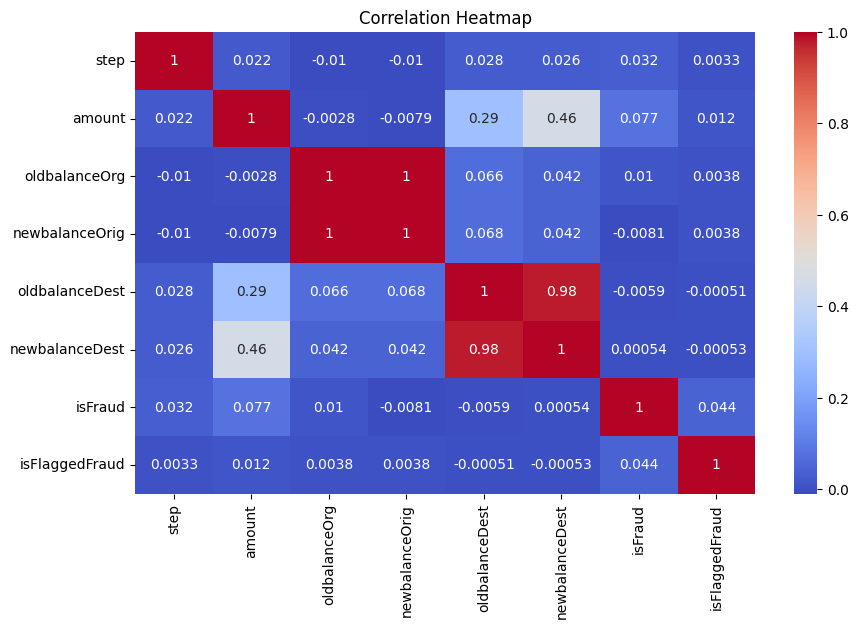

In [345]:
numeric_df = data.select_dtypes(include="number")
corr = numeric_df.corr()  # Get correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [346]:
(data['oldbalanceOrg'] == data["oldbalanceDest"]).value_counts()

False    5586475
True      776145
Name: count, dtype: int64

In [347]:
(data['newbalanceOrig'] == data["oldbalanceOrg"]).value_counts()

False    4273583
True     2089037
Name: count, dtype: int64

## data preprocessing 

In [348]:
data['type'] = data['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [349]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [350]:
#dropping data['isFlaggedFraud'] since it wont be needed 
data = data.drop('isFlaggedFraud', axis = 1)

In [351]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [352]:
# Select features and target
features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
            'oldbalanceDest', 'newbalanceDest']

X = data[features]
y = data['isFraud']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [353]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [354]:

# #applying this because the dataset is not balanced
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  
# X_train_resampled = X_train_resampled[:2000]
# y_train_resampled = y_train_resampled[:2000]


In [355]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# X_test = X_test[:2000]
# y_test = y_test[:2000]



<!-- #SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>

 -->


## Task: Define a function that creates models without and With specified Optimization techniques

<!-- ## Task: Define a function that creates models without and With specified Optimization techniques -->


In [356]:
# Define a function to create models with optimization techniques
def define_model(optimizer, regularization, early_stopping, dropout, learning_rate, layers):
    model = Sequential()
    for units in layers:
        model.add(Dense(units, activation='relu', kernel_regularizer=regularization))
        if dropout:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [399]:
def loss_curve_plot(history):
  epochs = range(1, len(history.history['loss']) + 1)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [358]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1= f1_score(y_test, y_pred, average='binary')

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NotFraud', 'Fraud'],
            yticklabels=['NotFraud', 'Fraud'])  # Assuming 0=NotFraud, 1=Fraud

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, y_pred_probs)
    print(f"AUC: {auc}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

In [372]:
import pandas as pd
from sklearn.utils import resample

# Combine X_test and y_test into a single DataFrame
X_test_df = pd.DataFrame(X_test)
X_test_df['label'] = y_test.values  # add labels as a new column

# Separate majority and minority classes
class_0 = X_test_df[X_test_df['label'] == 0]
class_1 = X_test_df[X_test_df['label'] == 1]

# Downsample majority class (class_0) to match minority class size (class_1)
class_0_downsampled = resample(class_0, 
                              replace=False,            # sample without replacement
                              n_samples=len(class_1),  # downsample to minority class size
                              random_state=42)

# Combine minority class with downsampled majority class
balanced_test_df = pd.concat([class_0_downsampled, class_1])

# Shuffle the resulting balanced dataset
balanced_test_df = balanced_test_df.sample(frac=1, random_state=42)

# Split back into features and labels
X_test_balanced = balanced_test_df.drop('label', axis=1)
y_test_balanced = balanced_test_df['label']


y_test_balanced.value_counts()


label
0    1208
1    1208
Name: count, dtype: int64

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [359]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# classes = np.array([0, 1])
# weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
# class_weights = dict(zip(classes, weights))
# print("Class Weights:", class_weights)


In [383]:
# Model 1: Adam optimizer, L2 regularization, Early stopping
class_weights = {0: 0.501, 1: 388.75}
model_1 = define_model(Adam, l2(0.01), True, 0.2, 0.001, [64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1, class_weight=class_weights,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8311 - loss: 0.4604 - val_accuracy: 0.9339 - val_loss: 0.2623
Epoch 2/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8979 - loss: 0.3012 - val_accuracy: 0.8400 - val_loss: 0.3527
Epoch 3/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9105 - loss: 0.2729 - val_accuracy: 0.9695 - val_loss: 0.1755
Epoch 4/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9182 - loss: 0.2553 - val_accuracy: 0.9419 - val_loss: 0.2400
Epoch 5/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9196 - loss: 0.2553 - val_accuracy: 0.9546 - val_loss: 0.2021
Epoch 6/100
17398/17398 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9186 - loss: 0.2428 - val_accuracy: 0.9353 - val_loss: 0.2145


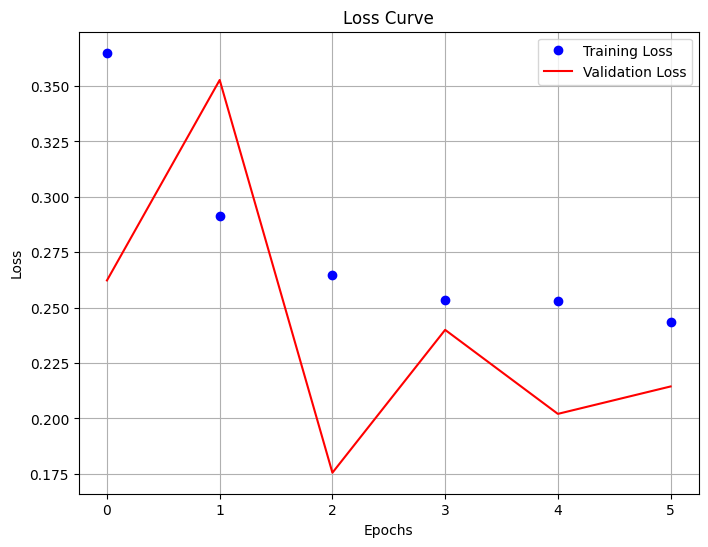

In [402]:
plot_loss_curve(history_1)


29825/29825 ━━━━━━━━━━━━━━━━━━━━ 18s 592us/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    953185
           1       0.01      0.97      0.02      1208

    accuracy                           0.90    954393
   macro avg       0.51      0.93      0.49    954393
weighted avg       1.00      0.90      0.95    954393



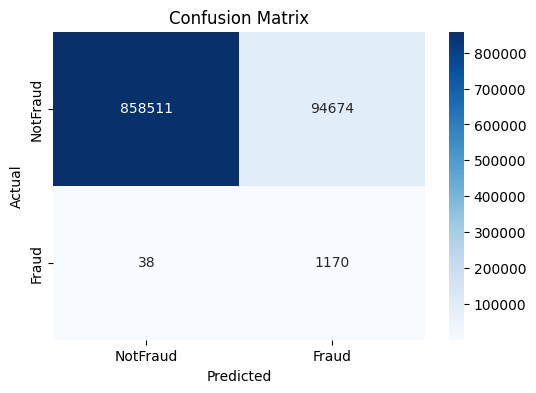

AUC: 0.9889153276882415


{'accuracy': 0.9007620550444104,
 'precision': 0.01220733692249906,
 'recall': 0.9685430463576159,
 'f1_score': 0.024110785970407618}

In [ ]:
# The data set was very skewed with not fraud cased being 99.8% of the data set. The model had a high accuracy but cant predict correctly. Hence, There will be a balanced X_test and y_test and y_test_balanced so see if the model can predict correctly.
evaluate_model(model_1, X_test, y_test)

## The data set is very skewed with "not fraud" cases being 99.8% of the data set. The model had a high accuracy but cant predict correctly. Hence, I balanced the X_test and y_test so the model can predict correctly.


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1208
           1       0.94      0.97      0.95      1208

    accuracy                           0.95      2416
   macro avg       0.95      0.95      0.95      2416
weighted avg       0.95      0.95      0.95      2416



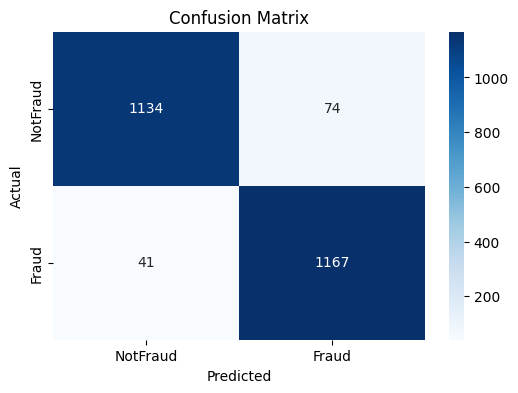

AUC: 0.9926243640629797


{'accuracy': 0.9524006622516556,
 'precision': 0.9403706688154714,
 'recall': 0.9660596026490066,
 'f1_score': 0.9530420579828501}

In [387]:
evaluate_model(model_1, X_test_balanced, y_test_balanced)

In [390]:
#Model 2: RMSprop optimizer, L1 regularization, No Early stopping
model_2 = define_model(RMSprop, l1(0.01), False, 0.2, 0.001, [64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=512, verbose=1, class_weight=class_weights,validation_data=(X_val, y_val))

Epoch 1/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7893 - loss: 0.7437 - val_accuracy: 0.9197 - val_loss: 0.3129
Epoch 2/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8324 - loss: 0.4616 - val_accuracy: 0.9126 - val_loss: 0.3205
Epoch 3/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8414 - loss: 0.4432 - val_accuracy: 0.9394 - val_loss: 0.2758
Epoch 4/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8637 - loss: 0.4124 - val_accuracy: 0.9304 - val_loss: 0.2908
Epoch 5/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8670 - loss: 0.4045 - val_accuracy: 0.9738 - val_loss: 0.1863
Epoch 6/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8679 - loss: 0.4064 - val_accuracy: 0.9120 - val_loss: 0.3048
Epoch 7/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8668 - loss: 0.3697 - val_accuracy: 0.9504 - val_loss: 0.2263
Epoch 8/100
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8722 -

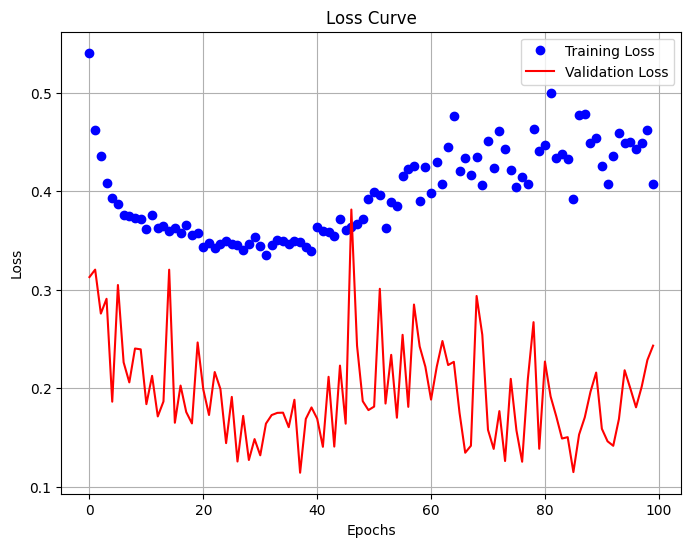

In [404]:
plot_loss_curve(history_2)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1208
           1       0.93      0.97      0.95      1208

    accuracy                           0.95      2416
   macro avg       0.95      0.95      0.95      2416
weighted avg       0.95      0.95      0.95      2416



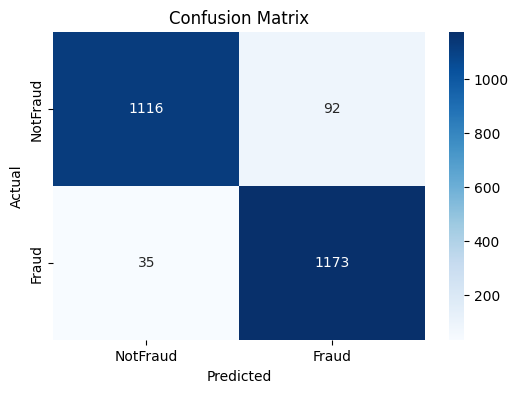

AUC: 0.985224058155344


{'accuracy': 0.9474337748344371,
 'precision': 0.9272727272727272,
 'recall': 0.9710264900662252,
 'f1_score': 0.9486453699959563}

In [405]:
evaluate_model(model_2, X_test_balanced, y_test_balanced)

In [407]:
model_3 = define_model(SGD, l1(0.01), True, 0.3, 0.001, [128, 64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9815 - loss: 8.8795 - val_accuracy: 0.9987 - val_loss: 3.4080
Epoch 2/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9987 - loss: 2.3489 - val_accuracy: 0.9987 - val_loss: 0.3596
Epoch 3/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9987 - loss: 0.2238 - val_accuracy: 0.9987 - val_loss: 0.0365
Epoch 4/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9987 - loss: 0.0348 - val_accuracy: 0.9987 - val_loss: 0.0189
Epoch 5/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9987 - loss: 0.0205 - val_accuracy: 0.9987 - val_loss: 0.0137
Epoch 6/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9987 - loss: 0.0157 - val_accuracy: 0.9987 - val_loss: 0.0116
Epoch 7/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9987 - loss: 0.0137 - val_accuracy: 0.9987 - val_loss: 0.0110
Epoch 8/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 215s 25ms/step - accuracy: 0.9987 - loss:

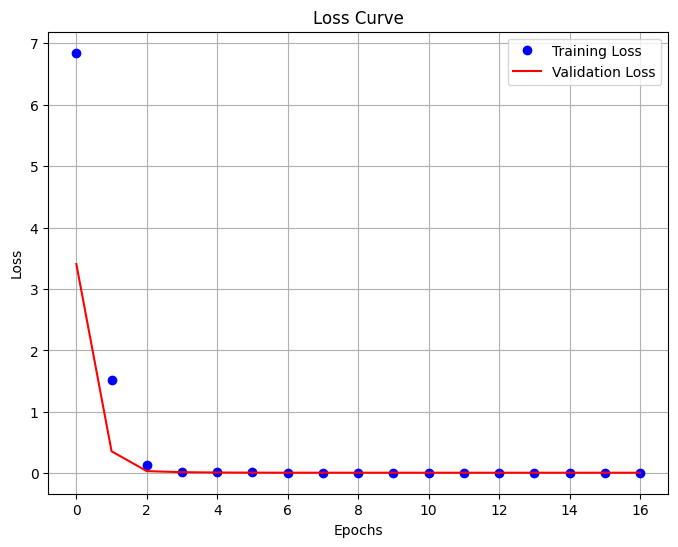

In [408]:
plot_loss_curve(history_3)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1208
           1       0.00      0.00      0.00      1208

    accuracy                           0.50      2416
   macro avg       0.25      0.50      0.33      2416
weighted avg       0.25      0.50      0.33      2416



c:\Users\Hp\Downloads\Online_Fraud_Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Downloads\Online_Fraud_Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Downloads\Online_Fraud_Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

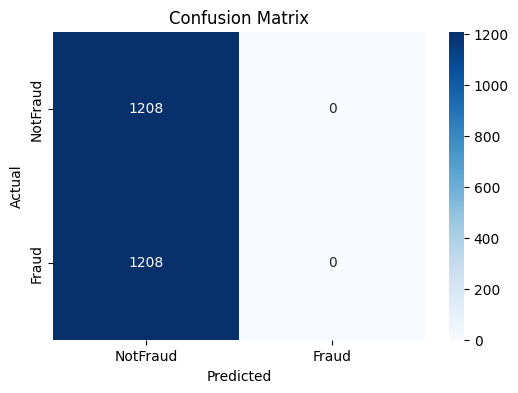

AUC: 0.5


{'accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}

In [413]:
evaluate_model(model_3, X_test_balanced, y_test_balanced)

In [430]:
from tensorflow.keras.optimizers import AdamW


In [ ]:

model_4 = define_model(AdamW, l2(0.01), True, 0.3, 0.0001, [256, 128, 64])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_4 = model_4.fit(X_train, y_train, epochs=50, batch_size=512,lass_weight=class_weights, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 0.9978 - loss: 0.6036 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 2/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 197s 16ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 3/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 91s 10ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 4/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 5/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 6/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 7/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9987 - val_loss: 0.0099
Epoch 8/50
8699/8699 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9987 - lo

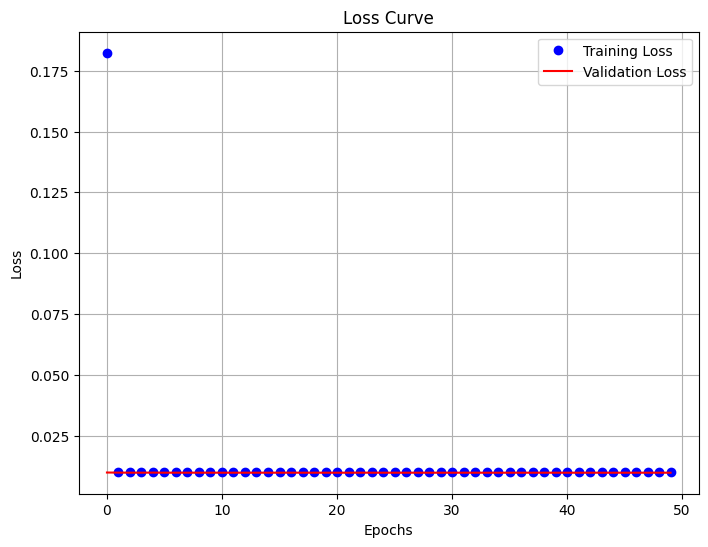

In [431]:
plot_loss_curve(history_4)

<!-- #Task: Make Predictions using the best saved model -->


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1208
           1       0.00      0.00      0.00      1208

    accuracy                           0.50      2416
   macro avg       0.25      0.50      0.33      2416
weighted avg       0.25      0.50      0.33      2416



c:\Users\Hp\Downloads\Online_Fraud_Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Downloads\Online_Fraud_Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Downloads\Online_Fraud_Detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

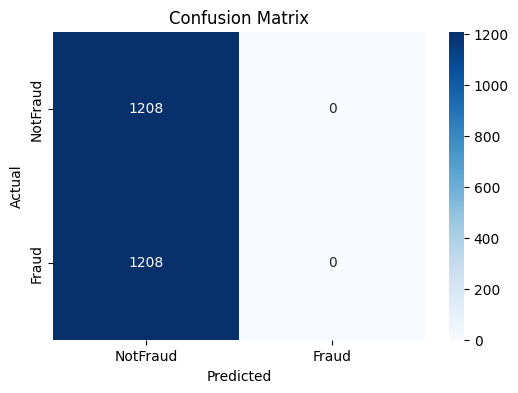

AUC: 0.49834437086092714


{'accuracy': 0.5, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}

In [425]:
evaluate_model(model_4, X_test_balanced, y_test_balanced)

<!-- Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible -->

<!-- Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later -->

In [ ]:
# def make_predictions(model_path, X):

#     # Load the model
#     model = load_model(None)
#     # Make predictions
#     predictions = None
#     # Convert probabilities to binary labels (0 or 1)

#     return predictions

# #Modify the code appropriately

In [ ]:
# model_path = None
# make_predictions(None)

<!-- Congratulations!! -->
